In [1]:
# Modelo WBK usando NaiveBayes
import pandas as pd
import seaborn as srn
import statistics  as sts

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso_Cientista_Dados/PP/dados_tratados.csv')
dados.head()

dados.head()

,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [3]:
# Analise exploratoria
dados.shape

(1000, 19)

In [ ]:
# Excluir as colunas "IDCREDITO"
dados = dados.drop(columns=['IDCREDITO'])

In [4]:
dados.head()

,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [5]:
# Explorar dados numericos

# Duracao
# dados['Duracao'].describe()

# Valor do empréstimo
# dados['Valor'].describe()

# Tempo de parcelamento do empréstimo
# dados['TempoParcelamento'].describe()

# Tempo de residência
# dados['ResidenciaDesde'].describe()

# Idade
dados['Idade'].describe()

# Empréstimos existente
# dados['EmprestimoExistente'].describe()

# Status
#dados['Status'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

<ipython-input-6-c326690ff33a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dados['Idade'])


<Axes: xlabel='Idade', ylabel='Density'>

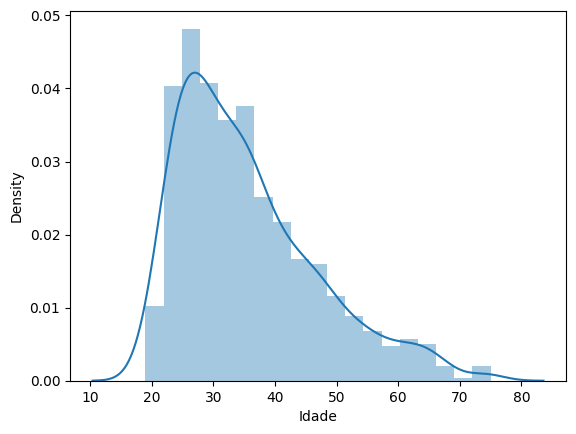

In [6]:
# Explorando Visualmente

# Duracao
#srn.boxplot(dados['Duracao']).set_title('Duracao')

# Valor do empréstimo
#srn.boxplot(dados['Valor']).set_title('Valor')

# Tempo de parcelamento do empréstimo
#srn.boxplot(dados['TempoParcelamento'])

# Tempo de residência
#srn.boxplot(dados['ResidenciaDesde'])

# Idade
srn.distplot(dados['Idade'])

# Empréstimos existente
# srn.boxplot(dados['EmprestimoExistente'])

# Status
# srn.boxplot(dados['Status'])

In [ ]:
# Explorar dados categoricos

# Histoico de credito
#agrupado = dados.groupby(['HistoricoCredito']).size()
#agrupado

# Proposito do empréstimo
#agrupado = dados.groupby(['Proposito']).size()
#agrupado

# Investimentos
#agrupado = dados.groupby(['Investimentos']).size()
#agrupado

# Emprego
#agrupado = dados.groupby(['Emprego']).size()
#agrupado

# Estado Civil
#agrupado = dados.groupby(['EstadoCivil']).size()
#agrupado

# Fiador
#agrupado = dados.groupby(['FiadorTerceiros']).size()
#agrupado

# Outros Financiamentos
#agrupado = dados.groupby(['OutrosFinanciamentos']).size()
#agrupado

# Habitacao
agrupado = dados.groupby(['Habitacao']).size()
agrupado

# Profissão
#agrupado = dados.groupby(['Profissao']).size()
#agrupado

# Dependentes
#agrupado = dados.groupby(['Dependentes']).size()
#agrupado

#Estrangeiro
#agrupado = dados.groupby(['Estrangeiro']).size()
#agrupado

Habitacao
1.0    709
2.0    107
3.0    175
dtype: int64

In [7]:
# Verificar NAs
dados.isna().sum()

Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Status                  0
dtype: int64

In [ ]:
# Tratar NAs
#dados['Emprego'].describe()
dados['ResidenciaDesde'].describe()

count    993.000000
mean       2.841893
std        1.103594
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: ResidenciaDesde, dtype: float64

In [ ]:
# Preencher emprego com moda
dados['Emprego'] = dados['Emprego'].fillna(dados['Emprego'].mode()[0])

In [ ]:
dados['Emprego'].describe()

count    1000.000000
mean        2.707000
std         1.125352
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Emprego, dtype: float64

In [ ]:
# Preencher habitacao com moda
dados['Habitacao'] = dados['Habitacao'].fillna(dados['Habitacao'].mode()[0])

In [ ]:
# Preencher ResidenciaDesde com a mediana
dados['ResidenciaDesde'] = dados['ResidenciaDesde'].fillna(dados['ResidenciaDesde'].median())

In [ ]:
dados['ResidenciaDesde'].describe()

count    1000.0000
mean        2.8430
std         1.0998
min         1.0000
25%         2.0000
50%         3.0000
75%         4.0000
max         4.0000
Name: ResidenciaDesde, dtype: float64

In [ ]:
# Verifica novamente
dados.isna().sum()

Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Status                  0
dtype: int64

In [ ]:
# Criar um DataFrame com os dados tratados
dados_tratados = pd.DataFrame(dados)

# Salvar em um arquivo CSV
dados_tratados.to_csv("dados_credito.csv", index=False)

# Supondo que seu DataFrame se chame df
dados_tratados.to_csv('dados_tratados.csv', index=False)

dados_tratados.shape

(1000, 19)

In [ ]:
from google.colab import files

files.download('dados_tratados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Criação do modelo
# Importações
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [9]:
dados.shape

(1000, 19)

In [12]:
# Formato de matriz
previsores = dados.iloc[:,[3, 10, 0, 2, 1]].values
classe = dados.iloc[:,18].values

In [13]:
dados.head()

,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [14]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
#labelencoder1 = LabelEncoder()
#previsores[:,1] = labelencoder1.fit_transform(previsores[:,1])

labelencoder2 = LabelEncoder()
previsores[:, 2] = labelencoder2.fit_transform(previsores[:, 2])

#labelencoder3 = LabelEncoder()
#previsores[:, 4] = labelencoder3.fit_transform(previsores[:, 4])

#labelencoder4 = LabelEncoder()
#previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

#labelencoder5 = LabelEncoder()
#previsores[:, 7] = labelencoder5.fit_transform(previsores[:, 7])

#labelencoder6 = LabelEncoder()
#previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

#labelencoder7 = LabelEncoder()
#previsores[:, 11] = labelencoder7.fit_transform(previsores[:, 11])

#labelencoder8 = LabelEncoder()
#previsores[:, 12] = labelencoder8.fit_transform(previsores[:, 12])

#labelencoder9 = LabelEncoder()
#previsores[:, 14] = labelencoder9.fit_transform(previsores[:, 14])

#labelencoder10 = LabelEncoder()
#previsores[:, 15] = labelencoder10.fit_transform(previsores[:, 15])

#labelencoder11 = LabelEncoder()
#previsores[:, 17] = labelencoder11.fit_transform(previsores[:, 17])

In [15]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[1318,   54,    8,    4,    2],
       [7814,   38,   17,    5,    2],
       [ 727,   33,    8,    1,    2],
       ...,
       [ 783,   26,    2,    4,    5],
       [2360,   36,   11,    5,    1],
       [1282,   32,   17,    1,    2]])

In [16]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [17]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [18]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 31,  44],
       [ 27, 198]])

In [19]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.7633333333333333

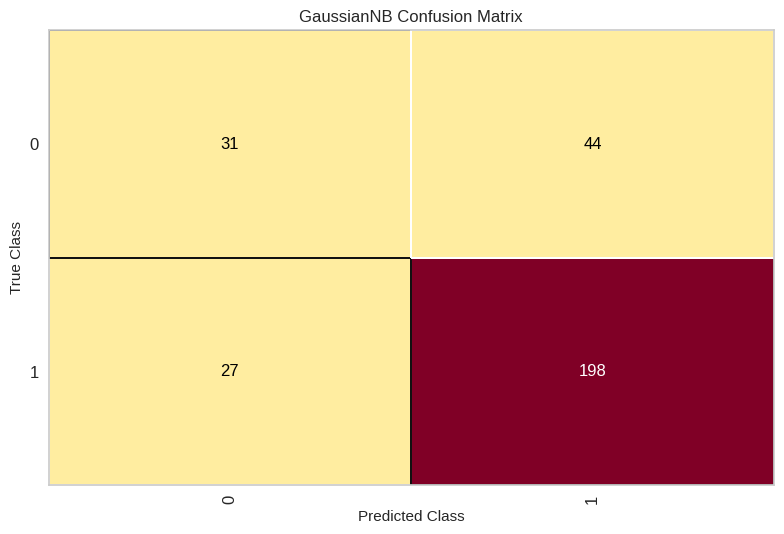

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [20]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [ ]:
dados.head()

,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [21]:
import pandas as pd
import random

# Definir os dados aleatórios
dados = {
    #"Duracao": [random.randint(12, 48)],
    "HistoricoCredito": [random.choice(["1", "2", "3", "4", "5"])],
    "Proposito": [random.choice(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])],
    "Valor": [random.randint(100, 20000)],
    #"Investimentos": [random.choice(["1", "2", "3", "4", "5"])],
    #"Emprego": [random.choice(["1", "2", "3", "4", "5"])],
    #"TempoParcelamento": [random.randint(1, 4)],
    #"EstadoCivil": [random.choice(["1", "2", "3", "4"])],
    "FiadorTerceiros": [random.choice(["1", "2", "3", "4"])],
    #"ResidenciaDesde": [random.randint(1, 4)],
    "Idade": [random.randint(18, 75)],
    #"OutrosFinanciamentos": [random.choice(["1", "2", "3"])],
    #"Habitacao": [random.choice(["1", "2", "3"])],
    #"EmprestimoExistente": [random.randint(1, 3)],
    #"Profissao": [random.choice(["1", "2", "3", "4"])],
    #"Dependentes": [random.randint(1, 2)],
    #"SocioEmpresa": [random.randint(0, 1)],
    #"Estrangeiro": [random.randint(0, 1)]
}

# Criar um DataFrame
df = pd.DataFrame(dados)

# Salvar em um arquivo CSV
df.to_csv("dados_credito.csv", index=False)

print("Arquivo CSV gerado com sucesso!")

df.head()

Arquivo CSV gerado com sucesso!


,HistoricoCredito,Proposito,Valor,FiadorTerceiros,Idade
0,5,2,1371,4,24


In [22]:
# Resultado da previsão
naive_bayes.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([0])